In [1]:
from os import listdir
import random
import matplotlib.pyplot as plt
from os.path import isfile, join
from tensorflow import keras
import os
import json
from sklearn.utils import shuffle
import matplotlib.image as mpimg
from IPython.display import clear_output


In [2]:
# Traning Questions
data_url = "http://206.12.93.90:8080/simpson2022_dataset/OpenEnded_abstract_v002_train2015_questions.zip"
zip_path = keras.utils.get_file("OpenEnded_abstract_v002_train2015_questions.zip", data_url,
                                cache_subdir='datasets/OpenEnded_abstract_v002_train2015_questions/', extract=True)
q_train_file = os.path.dirname(zip_path) + '/OpenEnded_abstract_v002_train2015_questions.json'

# Traning Annotations
data_url = "http://206.12.93.90:8080/simpson2022_dataset/abstract_v002_train2015_annotations.zip"
zip_path = keras.utils.get_file("abstract_v002_train2015_annotations.zip", data_url,
                                cache_subdir='datasets/abstract_v002_train2015_annotations/', extract=True)
anno_train_file = os.path.dirname(zip_path) + '/abstract_v002_train2015_annotations.json'


q_train = json.load(open(q_train_file))
anno_train = json.load(open(anno_train_file))

q_train['questions'] = sorted(q_train['questions'], key=lambda x: x['question_id'])
anno_train['annotations'] = sorted(anno_train['annotations'], key=lambda x: x['question_id'])

answers = ['yes', 'no', '0', '1', '2', '3', '4', '5',  # Numbers
           'black', 'white', 'red', 'yellow', 'brown', 'blue', 'gray', 'green', 'orange',  # Colors
           'right', 'left', 'woman', 'man', 'day', 'night', 'open', 'closed', 'top', 'down', 'fire', 'water',
           'glasses', 'glass', 'tree', 'tv', 'table', 'couch', 'book', 'car', 'ball',  # Objects
           'happy', 'sad', 'laughing',  # Expressions
           'eating', 'drinking', 'playing', 'walking', 'reading', 'cooking', 'sitting', 'standing', 'sleeping'
           # Actions
           ]


In [3]:
questions = {}
ids_to_answers = {}

for annotation in anno_train['annotations']:
    if annotation['multiple_choice_answer'] in answers:
        ids_to_answers[annotation['question_id']] = annotation['multiple_choice_answer']
        if annotation['multiple_choice_answer'] in questions:
            questions[annotation['multiple_choice_answer']][annotation['question_id']] = ''
        else:
            questions[annotation['multiple_choice_answer']] = {annotation['question_id'] : ''}

for q in q_train['questions']:
    if q['question_id'] in ids_to_answers.keys():
        # Preprocessing the question
        q_text = q['question']
        questions[ids_to_answers[q['question_id']]][q['question_id']] = q_text


In [4]:
images = ['imgs/' + f for f in listdir('imgs') if isfile(join('imgs', f))]
def get_total_questions():
    total_questions = {}
    for answer in answers:
        total_questions[answer] = 10
    file = open('data.txt', 'r+')
    while True:
        # Get next line from file
        line = file.readline()
        # if line is empty
        # end of file is reached
        if not line:
            break
        line = json.loads(line)
        total_questions[line['answer']] = total_questions[line['answer']] - 1
    file.close()
    return total_questions


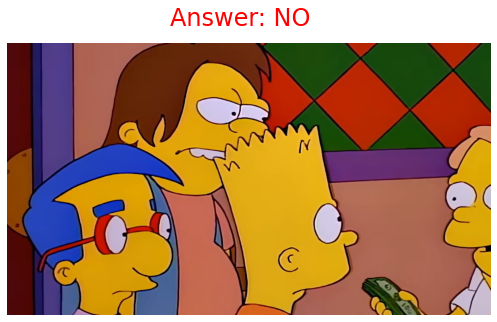

Examples of questions: 
['Is the plant going to wilt from the heat of the fire?', 'Is there anything abnormal about the left picture on the wall?', 'Is the boy in the red shirt laughing at the pink rocking horse toy?', 'Is anyone on the monkey bars?', 'If closed, would the curtains cover the entire window?', 'Is she riding the skateboard?', 'Have the people cut the pie?', 'Are there any children?', 'Is there a tv in the room?', 'Is this an old man on the monkey bars?']
KeyboardInterrupt exception is caught


In [10]:
total_questions = get_total_questions()
try:
    for answer in total_questions.keys():
        while total_questions[answer] != 0:
            clear_output(wait=True)
            idx = random.randint(0, len(images))
            fig = plt.figure(figsize=(10,5))
            plt.imshow(mpimg.imread(images[idx]))
            fig.suptitle('Answer: ' + answer.upper(), fontsize=24, color='r')
            plt.axis('off')
            plt.show()
            print('Examples of questions: ')
            print(shuffle(list(questions[answer].values()))[:10])
            q = input(str(total_questions[answer]) + "- Please ask a question for which the answer is \"" +answer.upper() + "\"?:\n")
            if q.strip() != '':
                file = open('data.txt', 'a')
                file.write("{\"answer\":\"" + answer + "\",\"question\":\"" + q + "\",\"image_id\":\"" + str(images[idx]) + "\"}" + '\n' )
                file.flush()
                file.close()            
            total_questions = get_total_questions()
except KeyboardInterrupt:
    print ('KeyboardInterrupt exception is caught')
            
    